Set up environment

In [1]:
import sys
import os

# Add the project's root directory to the Python path
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_vision_completion, get_image_generation_completion, get_completion, save_artifact, clean_llm_output, recommended_models_table
from IPython.display import Image, display, Code

image_client, image_model_name, image_api_provider = setup_llm_client(model_name="gemini-2.5-flash-image-preview")
print(f"✅ Using {image_model_name} for image generation")

# Ensure you select a vision-capable model
vision_client, vision_model_name, vision_api_provider = setup_llm_client(model_name="gemini-2.5-pro")
print(f"✅ Using {vision_model_name} for vision tasks")

edit_client, edit_model_name, edit_api_provider = setup_llm_client(model_name="gemini-2.5-flash-image-preview")
print(f"✅ Using {edit_model_name} for editing tasks")



if not image_model_name or not vision_model_name:
    print("Could not set up a valid LLM client. Please check your .env file and utils.py configuration.")

2025-11-06 10:35:24,400 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None


✅ Using gemini-2.5-flash-image-preview for image generation


2025-11-06 10:35:25,649 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-pro latency_ms=None artifacts_path=None


✅ Using gemini-2.5-pro for vision tasks


2025-11-06 10:35:27,239 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None


✅ Using gemini-2.5-flash-image-preview for editing tasks


Design Screenshot

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: C:\Users\labadmin\Documents\220372-AG-AISOFTDEV-Team-2-CodeVoyagers\artifacts\screens\image_1762443937.png



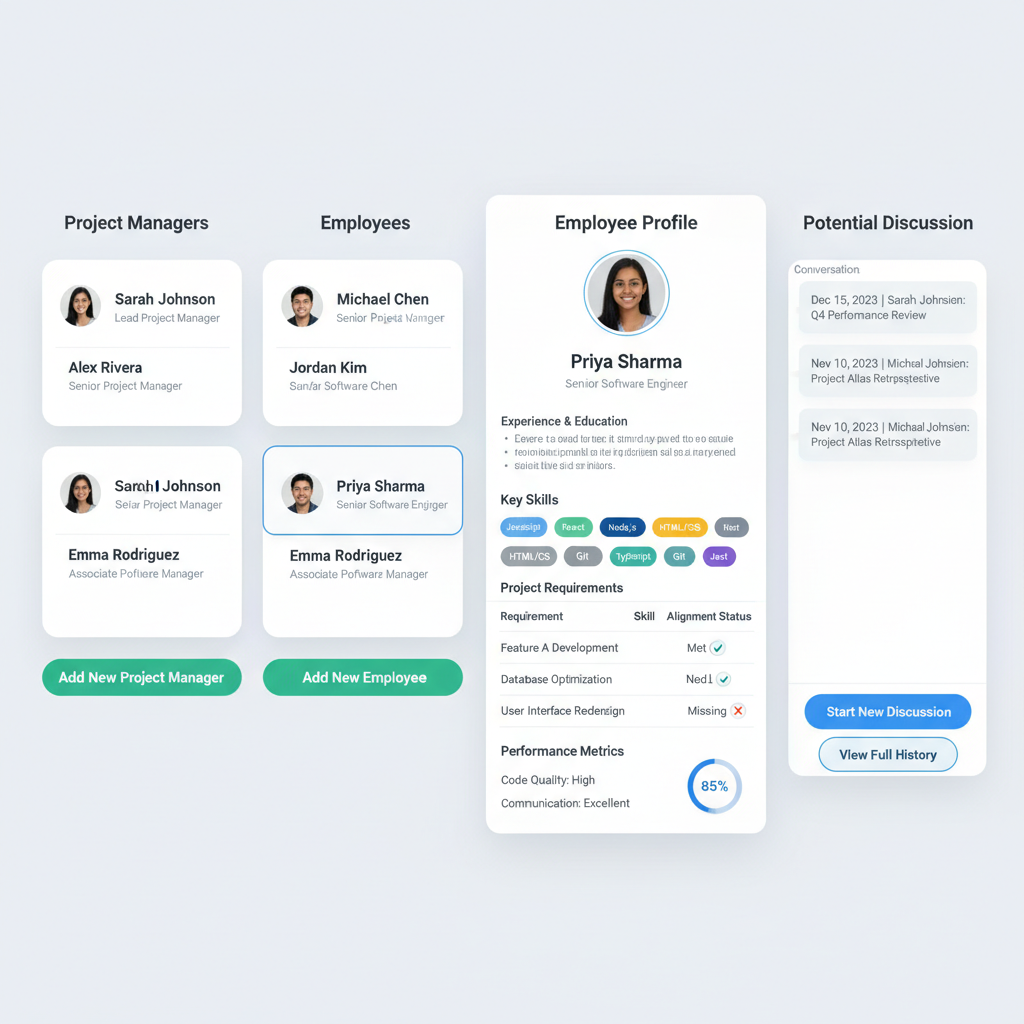

In [6]:
screen_generation_prompt = """
Generate a detailed screen design for a Performance Evaluation Dashboard web application based on the following specifications. The output should describe the visual layout, content placement, styling, and interactive elements—not the HTML or CSS code.

**Screen specifications:**
- 4-column responsive grid layout matching the dashboard design
- Column 1: "Project Managers" section with cards for Sarah Johnson, Michael Chen, Emma Rodriguez, and an "Add New Project Manager" button
- Column 2: "Employees" section with cards for Alex Rivera, Jordan Kim, Priya Sharma, and an "Add New Employee" button  
- Column 3: "Employee Profile" section showing detailed profile for Priya Sharma including:
  * Header with name and title
  * Experience & Education details
  * Key Skills displayed as colored badges (JavaScript, React, Node.js, HTML/CSS, Git, TypeScript, Jest)
  * Project Requirements table with skill alignment status
  * Performance Metrics with velocity score
- Column 4: "Potential Discussion" section with conversation history and action buttons

**Styling and visual guidelines:**
- Light background (#f8f9fa) with clean, professional appearance
- Card-based layout with subtle shadows and rounded corners
- Primary blue color scheme (#0366d6) for buttons and accents
- Green buttons for "Add New" actions
- Skills displayed as colored badges/pills
- Tables with alternating row colors and hover effects
- Responsive design that stacks columns on mobile devices
- Modern, readable typography
- Hover effects on interactive elements

**Instructions:**
- Provide a clear, structured description of the screen, including layout, sections, visual hierarchy, colors, and interactive elements.
- Describe how each column and component should look and behave.
- Use a professional UX/UI perspective to convey the design, spacing, and user interactions.
- Do NOT generate HTML, CSS, or code—focus on visual and functional design details.

"""

print(f"Using {image_model_name} for image generation...")
file_path, image_url = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

# Display the generated image if successful
if file_path and image_url:
    print(f"✅ Generated image saved to: {file_path}")
    display(Image(url=image_url))
elif image_url:
    print(f"❌ Image generation failed: {image_url}")
else:
    print("❌ Image generation returned no result")